# MNIST


In [1]:
# imports
import numpy as np  # linear algebra
from os.path import join
import random
import matplotlib.pyplot as plt
%matplotlib inline
TRAIN_SET = 10000                # MAX 60000
TEST_SET = 10000                   # MAX 10000
IMG_DIM = 28                    # HEIGHT = WIDTH 
IMG_PIXELS = IMG_DIM * IMG_DIM  # HEIGHT * WIDTH 

In [2]:
# Set file paths based on added MNIST Datasets

input_path = '../dataset'
training_images_filepath = join(input_path, 'train/train-images.idx3-ubyte')
training_labels_filepath = join(input_path, 'train/train-labels.idx1-ubyte')
test_images_filepath = join(input_path, 'test/t10k-images.idx3-ubyte')
test_labels_filepath = join(input_path, 'test/t10k-labels.idx1-ubyte')


In [3]:
# Load MINST dataset
from mnist_dataloader import MnistDataloader

mnist_dataloader = MnistDataloader(
    training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train_, y_train_), (x_test_, y_test_) = mnist_dataloader.load_data()
x_test = np.array(x_test_[:TEST_SET]).reshape(TEST_SET,IMG_PIXELS)
y_test = np.array(y_test_[:TEST_SET]).reshape(TEST_SET, 1)
x_train = np.array(x_train_[:TRAIN_SET][:][:]).reshape(TRAIN_SET,IMG_PIXELS)
y_train = np.array(y_train_[:TRAIN_SET]).reshape(TRAIN_SET, 1)

print(f'Shape of x_train (training image dataset)   = {x_train.shape}')
print(f'Shape of y_train (training labels)          = {y_train.shape}')
print(f'Shape of x_test  (testing image dataset)    = {x_test.shape}')
print(f'Shape of y_test  (testing labels)           = {y_test.shape}')


Shape of x_train (training image dataset)   = (10000, 784)
Shape of y_train (training labels)          = (10000, 1)
Shape of x_test  (testing image dataset)    = (10000, 784)
Shape of y_test  (testing labels)           = (10000, 1)


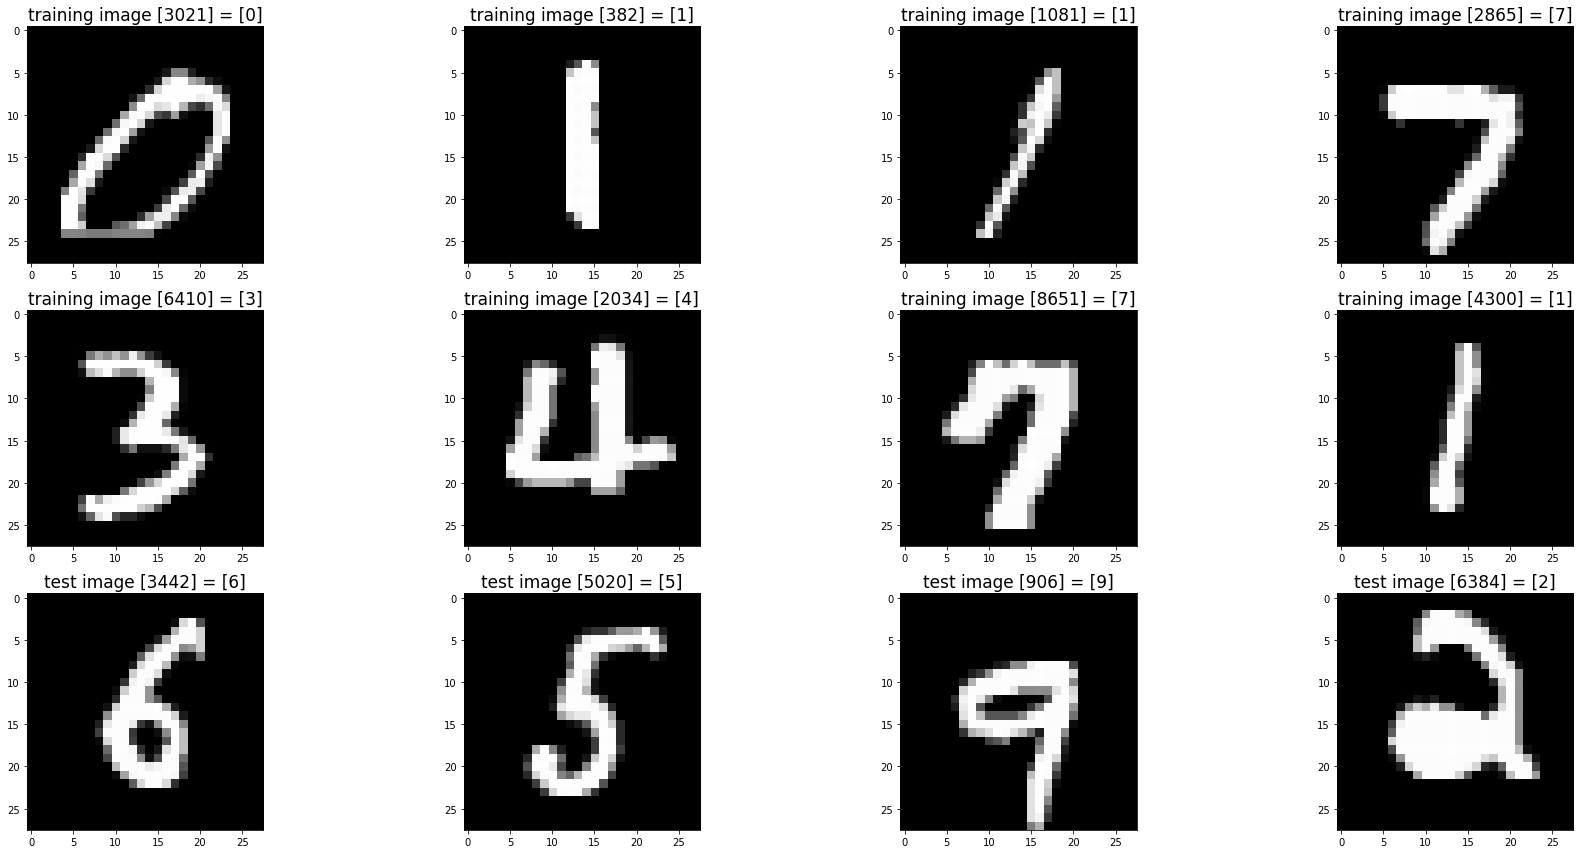

In [4]:
def show_images(images, title_texts):
    cols = 4
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30, 20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image.reshape(IMG_DIM,IMG_DIM), cmap=plt.cm.gray, interpolation="None")
        if (title_text != ''):
            plt.title(title_text, fontsize=17)
        index += 1

# Show some random training and test images
img_display = []
title_display = []
for i in range(0, 8):
    # r = random.randint(1, 20000)
    r = random.randint(1, TRAIN_SET-1)
    img_display.append(x_train[r])
    title_display.append(
        'training image [' + str(r) + '] = ' + str(y_train[r]))

for i in range(0, 4):
    # r = random.randint(1, 2000)
    r = random.randint(1, TEST_SET-1)
    img_display.append(x_test[r])
    title_display.append('test image [' + str(r) + '] = ' + str(y_test[r]))

show_images(img_display, title_display)


In [6]:
from neutral_network import Neural_Network
n = Neural_Network()

Epochs :: 30


In [7]:
n.train(x_train, y_train)

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30


In [8]:
n.predict(x_test[10])

array([[8.20026796e-01],
       [9.15647919e-04],
       [8.92967785e-03],
       [6.55821871e-03],
       [1.85687005e-06],
       [1.93526586e-04],
       [6.96675687e-04],
       [7.00896687e-03],
       [3.09024971e-02],
       [8.80861102e-02]])

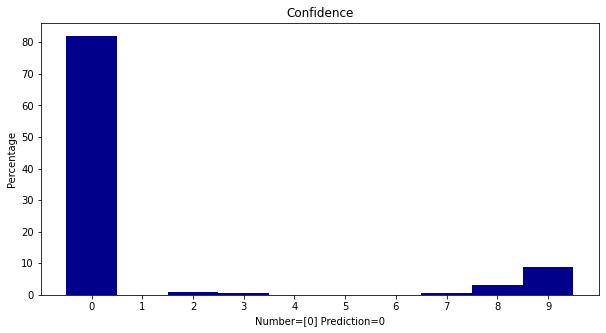

In [9]:
x = range(10)
# values = list(data.values())
y = n.predict(x_test[10]).reshape((10)) * 100
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='darkblue',
        width = 1,tick_label=["0","1","2","3","4","5","6","7","8","9"])

plt.xlabel(f"Number={y_test[10]} Prediction={np.argmax(n.predict(x_test[10]))}")
plt.ylabel("Percentage")
plt.title("Confidence")
plt.show()

In [10]:
n.export()

In [11]:
n.test(x_test, y_test)

Test samples :: 10000
Accuracy of the Model :: 86.64%
